In [49]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.utils import *

In [50]:
model = Sequential()
model.add(Embedding(10,50, embeddings_initializer='ones', input_length=1))

# 입력 1개, 워딩 10개, 출력 50개, 

In [51]:
# # model.get_weights()
# plot_model(model, show_shapes=True)

In [52]:
inputs = np.array([1,2,3,4,5,6,7,8,9,0])
outputs = model.predict(inputs)

1/1 [==============================] - 0s 27ms/step


In [53]:
inputs.shape, outputs.shape

((10,), (10, 1, 50))

In [54]:
inputs2 = np.array([0,1,2,3,4,5,6,7,8,9])
inputs2 = np.expand_dims(np.array([0,1,2,3,4,5,6,7,8,9]), axis = 0)
inputs2.shape

(1, 10)

In [55]:
outputs2 = model.predict(inputs2)

1/1 [==============================] - 0s 30ms/step


In [56]:
inputs2.shape, outputs2.shape

((1, 10), (1, 10, 50))

In [57]:
text = [['I', 'am', 'a','boy'],['I', 'am', 'a','student']]
text

[['I', 'am', 'a', 'boy'], ['I', 'am', 'a', 'student']]

In [59]:
data = np.array(text)
data.shape

(2, 4)

In [65]:
# Hello, how are you doing
data = [0, 1, 2, 3, 4]
# Hello, how are you feeling
data2 = [0, 1, 2, 3, 5]

model = Sequential()
model.add(Embedding(6,2,embeddings_initializer='uniform', input_length=5))

inputs = np.expand_dims(np.array(data2), axis = 0)
# inputs, inputs.shape

outputs = model.predict(inputs)
# outputs.shape
outputs[0]

1/1 [==============================] - 0s 25ms/step


array([[ 0.03718496, -0.01867393],
       [-0.01629127, -0.02738882],
       [-0.02486101, -0.04144012],
       [-0.0066911 ,  0.04451103],
       [ 0.03094361, -0.03864646]], dtype=float32)

In [64]:
inputs

array([[0, 1, 2, 3, 5]])

## 영화 사이트 

In [82]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocabulary_size = 5000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
word_to_idx = imdb.get_word_index()
idx_to_word = dict([(value, key) for (key, value) in word_to_idx.items()])
decoded_review = ' '.join([idx_to_word.get(i) for i in X_train[0]])

In [85]:
pad_inputs = pad_sequences(X_train, maxlen=2000, value=0.0)
pad_inputs[0]

array([  0,   0,   0, ...,  19, 178,  32])

In [98]:
model2 = Sequential()
model2.add(Embedding(5000, 2, input_length=2000))
result = model2.predict(pad_inputs)

782/782 [==============================] - 1s 746us/step


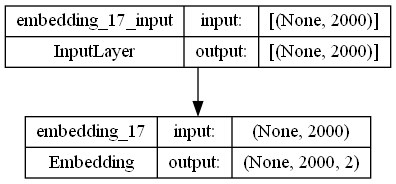

In [99]:
plot_model(model2, show_shapes=True)

In [111]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
reviews = [
    'Great',
    'Not bad',
    'Awesome',
    'Poor',
    'Worst',
    'Great',
    'Not bad',
    'Awesome',
    'Poor',
    'Worst'
]
labels = np.array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0])
vocab_size = 10
one_hot_review = [one_hot(d, vocab_size) for d in reviews]
# print(one_hot_review)
max_length = 4
result = pad_sequences(one_hot_review, maxlen=max_length, padding='post')
# result.shape, result
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=max_length))
# plot_model(model3, show_shapes=True)
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
model3.fit(result, labels, epochs=10, verbose=1)
score = model3.predict(result)
score

Epoch 1/10
1/1 [==============================] - 0s 416ms/step - loss: 0.6869 - acc: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6858 - acc: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6846 - acc: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6835 - acc: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6824 - acc: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6813 - acc: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6802 - acc: 0.6000
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6790 - acc: 0.8000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6779 - acc: 0.8000
Epoch 10/10
1/1 [==============================] - 0s 37ms/step


array([[0.5033431 ],
       [0.52353424],
       [0.51979804],
       [0.49908647],
       [0.50300866],
       [0.5033431 ],
       [0.52353424],
       [0.51979804],
       [0.49908647],
       [0.50300866]], dtype=float32)

In [87]:
result.shape

(25000, 2000)

In [84]:
len(X_train[0]), len(X_train[1]), len(X_train[2]), len(X_train[3])

(218, 189, 141, 550)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

### 연습

In [114]:
import numpy as np
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import *
import re 
max_sequence_length = 100
num_distinct_words = 10000
embedding_output_dims = 15
loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
number_of_epochs = 100 # 전체 데이터셋 학습이 완료된 것 = epoch
verbosity_mode = True #연산속도, 출력속도를 나타내는. True=디폴트 1(전체 다 나옴)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_distinct_words)
X_train.shape, X_test.shape

((25000,), (25000,))

In [113]:
padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0)
padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0)


In [128]:
model = Sequential()
model.add(Embedding(100, 15, input_length=100))
model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=2, padding = 'same', activation='relu'))
#filter ==> 학습되는 파라미터. 출력 차원의 개수
# kerner_size ==> 합성곱이 적용되는 가로의 길이
# padding ==> 'VALID or SAME'
# activation ==> 활성화함수

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))



model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 100, 15)           1500      
                                                                 
 dropout_3 (Dropout)         (None, 100, 15)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 32)           992       
                                                                 
 dropout_4 (Dropout)         (None, 100, 32)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 50, 32)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                     

In [130]:
test_results = model.evaluate(padded_inputs_test, y_test, verbose = True)
print(f'Test results - Loss : {test_results[0]} - Accuracy: {100*test_results[1]}%')

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_27/embedding_26/embedding_lookup' defined at (most recent call last):
    File "C:\Users\qwekl\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\qwekl\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\qwekl\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\qwekl\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\qwekl\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\qwekl\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\qwekl\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\qwekl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\qwekl\AppData\Local\Temp\ipykernel_9496\163501362.py", line 1, in <module>
      test_results = model.evaluate(padded_inputs_test, y_test, verbose = True)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in test_step
      y_pred = self(x, training=False)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\qwekl\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_27/embedding_26/embedding_lookup'
indices[0,33] = 591 is not in [0, 100)
	 [[{{node sequential_27/embedding_26/embedding_lookup}}]] [Op:__inference_test_function_65140]

In [ ]:
dropout : weight값이 몰릴때, 많이 전달될 수 있도록
얼리 : 동일한 값이 계속 반복될때 기준점으로 조기종료

In [119]:
from keras.datasets.imdb import load_data
max_feature = 2000
(X_train, y_train), (X_val, y_val) = load_data(num_words=max_feature)

maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

model = Sequential()
model.add(Embedding(2000, 128, input_length=200))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 200, 128)          256000    
                                                                 
 lstm (LSTM)                 (None, 200, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 338,497
Trainable params: 338,497
Non-trainable params: 0
_________________________________________________________________
